# CRISP-DM


## 1. Business Understanding
Cílem projektu je analyzovat a předpovědět, zda osoba vydělává více nebo méně než 50 000 USD ročně a to na základě demografických a ekonomických atributů.

Otázky ke zodpovězení:
- Které faktory nejvíce ovlivňují příjem?
- Jak přesně dokážeme predikovat příjem?

Pro tento projekt jsem zvolil dataset: [Adult dataset](https://archive.ics.uci.edu/dataset/2/adult)



## 2. Data Understanding
Pro porozumnění datasetu provedeme průzkumnou analýzu dat, budeme věnovat pozornost chybějícím a odlehlým datům, vzorům, vztahům mezi proměnými (věk, vzdělání, odpracované hodiny) a příjmem.

### Popis dat

Zdroj dat: [UCI Machine Learning Repository - Adult Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data)

| Atribut          | Popis                                                                                 |
|:------------------|:---------------------------------------------------------------------------------------|
| age              | Věk jednotlivce                                                                       |
| workclass        | Typ zaměstnavatele jednotlivce (např. soukromý sektor, samostatně výdělečně činný, vládní apod.) |
| fnlwgt           | Finální váha. Počet lidí, které tento záznam při sčítání zastupuje                     |
| education        | Nejvyšší dosažené vzdělání jednotlivce                                                |
| education-num    | Nejvyšší dosažené vzdělání ve formě čísla                                             |
| marital-status   | Rodinný stav jednotlivce                                                              |
| occupation       | Obecný typ zaměstnání jednotlivce                                                     |
| relationship     | Role jednotlivce v rodině (např. manžel, manželka, syn, dcera apod.)                  |
| race             | Rasa jednotlivce                                                                     |
| sex              | Pohlaví jednotlivce                                                                  |
| capital-gain     | Příjem z investičních zdrojů mimo mzdy/platy                                          |
| capital-loss     | Ztráty z investičních zdrojů mimo mzdy/platy                                          |
| hours-per-week   | Počet odpracovaných hodin týdně                                                       |
| native-country   | Země původu jednotlivce                                                              |
| income           | Zda jednotlivec vydělává více než 50 000 USD ročně                                   |



---



**Vysvětlení atributu educational_num**

 | **Vzdělání**            | **Číslo vzdělání** |
|--------------------------|--------------------|
| Předškolní              | 1                  |
| 1. až 4. třída          | 2                  |
| 5. až 6. třída          | 3                  |
| 7. až 8. třída          | 4                  |
| 9. třída                | 5                  |
| 10. třída               | 6                  |
| 11. třída               | 7                  |
| 12. třída               | 8                  |
| Středoškolské vzdělání  | 9                  |
| Nějaká vysoká škola     | 10                 |
| Asociovaný titul        | 11                 |
| Bakalářský titul        | 13                 |
| Magisterský titul       | 14                 |
| Doktorský titul         | 16                 |


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
data = pd.read_csv(url, names=column_names, na_values="?", skipinitialspace=True)

In [3]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Máme numerické i kategorické hodnoty, bude tedy zapotřebí kategorické hodnoty zakódovat (encode).

#### Základní informace


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Statistická analýza

##### Číselné vlastnosti

In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Zde můžeme získat náhled do datasetu, protože se seznámíme s daty v něm obsaženými.
Např. Údaje byly shromážděny o osobách ve věku 17-90 let, které pracují 1-99 hodin týdně, mají 1-16 let vzdělání atd.

##### Statistiky kategorických vlastnosti

In [6]:
columns_to_plot = ['income', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

for feature in columns_to_plot:
    print(feature)
    print(data[feature].value_counts())
    print()

income
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

marital_status
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

o

Analýza datasetu Adult odhalila několik klíčových poznatků:  
- **Rozdělení příjmů:** Jasně ukazuje rozdělení, přičemž většina vydělává ≤50K.  
- **Pracovní třída a zaměstnání:** Významný podíl pracuje v soukromém sektoru a v profesních specializacích, avšak některé kategorie, včetně 'workclass' a 'occupation', obsahují nulové hodnoty označené jako "?".  
- **Vzdělání:** Velmi různorodé, přičemž většina lidí má středoškolské vzdělání nebo nějaké vysokoškolské vzdělání, což ukazuje na pestré vzdělávací zázemí.  
- **Rodinný stav a vztahy:** Dominují ženatí/vdané osoby a osoby, které nikdy nebyly ženaté/vdané, což odráží různorodé sociální statusy.  
- **Demografie:** Převážně běloši a muži, což naznačuje určité demografické trendy v datasetu.  
- **Země původu:** Většina pochází ze Spojených států, s minimálním zastoupením ostatních zemí.  

Nulové hodnoty v 'workclass', 'occupation' a 'native_country' naznačují chybějící data, která je třeba během předzpracování pečlivě ošetřit, aby byly výsledky klasifikace přesné.


### Vizualizace číselných vlastností

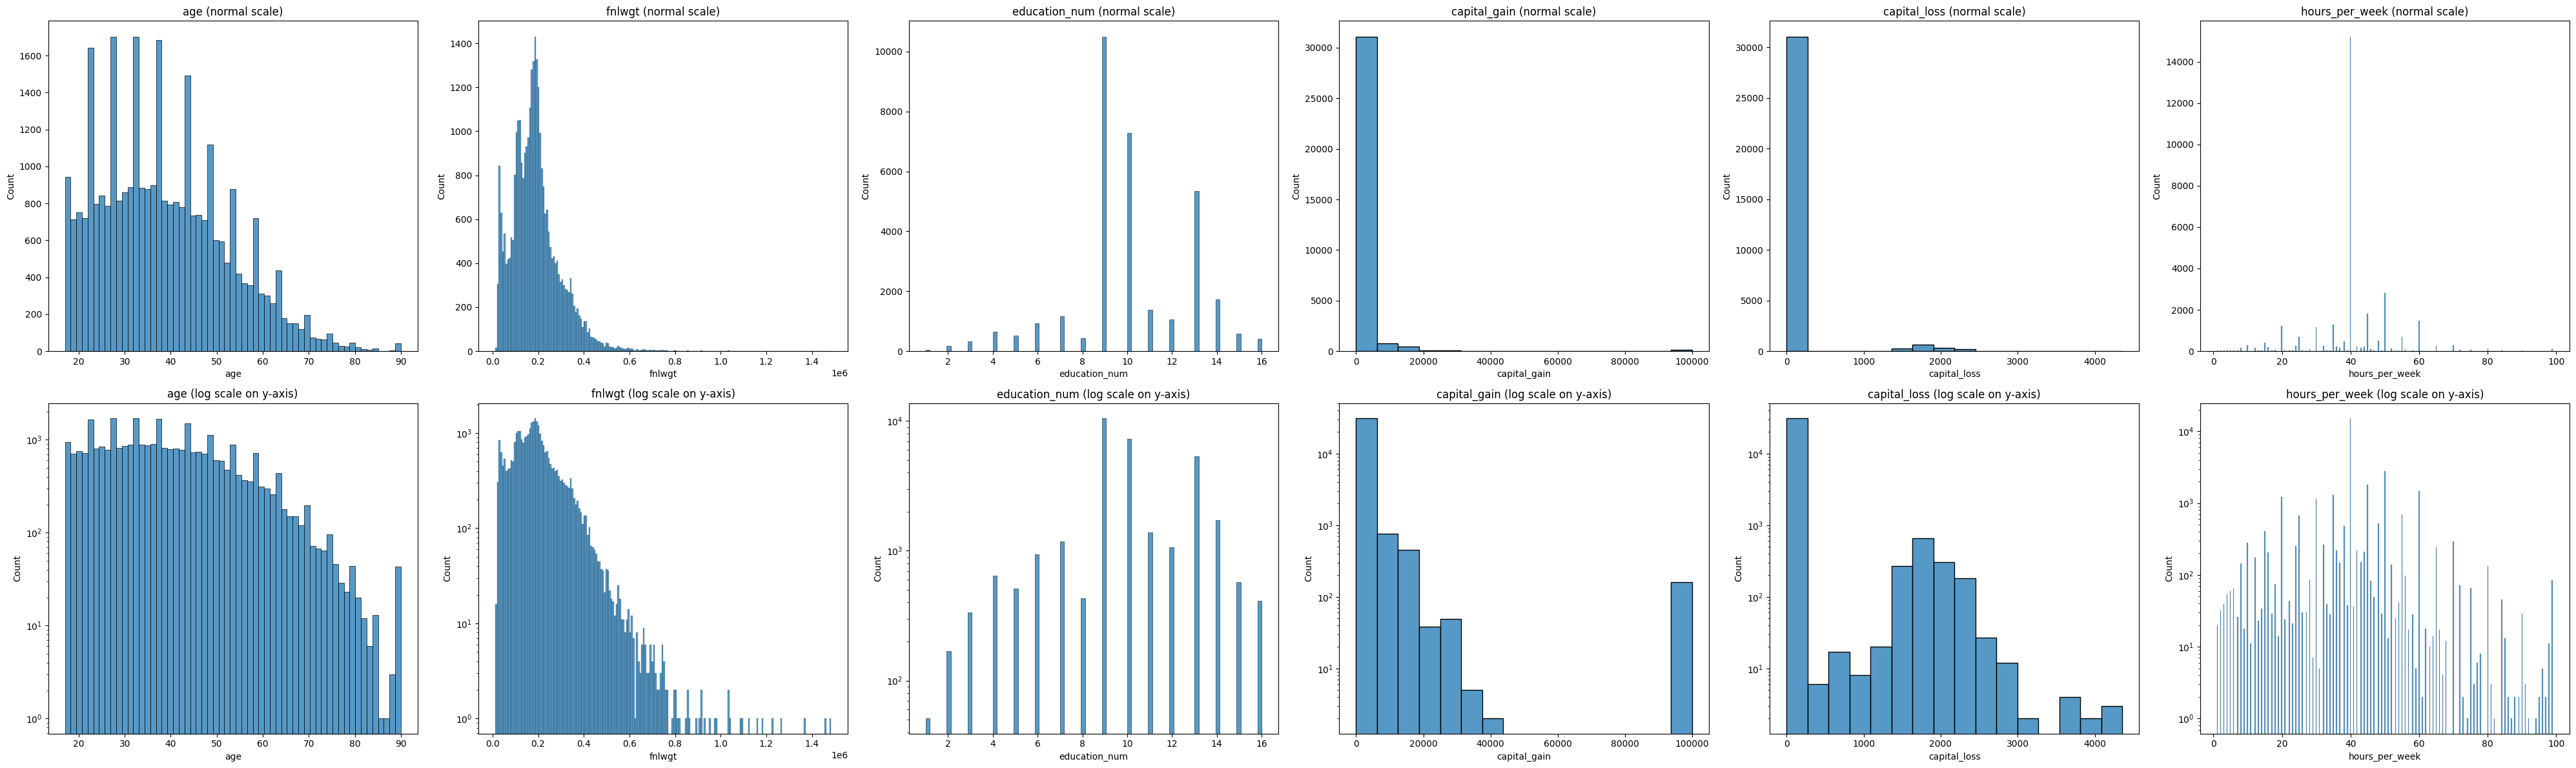

In [7]:
df_only_numeric = data.select_dtypes(np.number)

# Create the subplots
n_cols = df_only_numeric.shape[1]
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(40, 12))

for i, column in enumerate(df_only_numeric):
    # First row for normal scale
    sns.histplot(df_only_numeric, x=column, ax=axes[0, i]).set_title(f'{column} (normal scale)')

    # Second row for log scale on y-axis
    sns.histplot(df_only_numeric, x=column, ax=axes[1, i]).set_yscale('log')
    axes[1, i].set_title(f'{column} (log scale on y-axis)')

plt.tight_layout()
plt.show()



Zde jasně vidíme rozdělení počtů, které jsou zobrazeny ve dvou řadách:  
1. První řada je škálována normálně.  
2. Druhá řada používá logaritmické měřítko na ose Y (osa počtu), aby lépe vizualizovala kapitálové zisky a ztráty.  

Z těchto histogramů je zřejmé, že škálování dat bude nutné.  

Vidíme také, že většina shromážděných dat pochází od lidí ve věku 24–50 let. Většina má vzdělání odpovídající 9–10 letům.  

Dále vidíme, že histogramy věku a `fnlwgt` vykazují levostrannou šikmost.  

### Vizualizace histogramů poskytuje dvouúrovňový pohled na data:

- **První řada** ukazuje rozdělení při normálním škálování, což poskytuje obecný přehled.  
- **Druhá řada** aplikuje logaritmické měřítko na osu Y, což zlepšuje vizualizaci kapitálových zisků a ztrát a odhaluje vzorce, které by mohly být na lineární škále přehlédnuty kvůli přítomnosti extrémních hodnot.  

### Pozorování a implikace

- **Nutnost škálování:** Histogramy zdůrazňují potřebu škálování dat. Logaritmická transformace zejména ukazuje široký rozsah hodnot u kapitálových zisků a ztrát, což vyžaduje normalizaci, aby tyto prvky přispívaly k analýze úměrně.  

- **Demografické poznatky:** Rozdělení věku ukazuje, že většina datasetu zahrnuje jednotlivce ve věku 24–50 let, což pravděpodobně představuje aktivní pracovní sílu.  

- **Vzdělávací úroveň:** Významná část populace vykazuje vzdělání odpovídající 9–10 letům, což může odpovídat dokončení zákládní školy.  

- **Šikmost dat:** Histogramy věku a `fnlwgt` vykazují levostrannou šikmost, což naznačuje vyšší koncentraci mladších jedinců v datasetu a tendenci k nižším hodnotám finální váhy (`fnlwgt`).  

Tyto poznatky jsou klíčové, protože nás směrují k významným krokům předzpracování, jako je normalizace, a zároveň upozorňují na demografické trendy, které mohou být důležité pro následné analýzy.


In [8]:
capital_gain_zeros = (data['capital_gain'] == 0).sum()
capital_loss_zeros = (data['capital_loss'] == 0).sum()

print(f"capital_gain: {capital_gain_zeros} instances of 0")
print(f"capital_loss: {capital_loss_zeros} instances of 0")

capital_gain: 29849 instances of 0
capital_loss: 31042 instances of 0


- **Převaha ne-investorů:** Dominantní hodnota 0 odráží skutečnost, že vetšina účastníků neinvestuje a tudíž nemohlo dojít k ziskům ani ztrátám.

Toto pozorování zdůrazňuje oblast finanční aktivity mezi účastníky, která může korelovat s dalšími zkoumanými socioekonomickými faktory.

### Modus datové sady

In [9]:
# Calculate the mode for each column and pick the first mode if there are multiple
mode_values = data.mode().iloc[0]
print(mode_values)

age                             36.0
workclass                    Private
fnlwgt                        123011
education                    HS-grad
education_num                    9.0
marital_status    Married-civ-spouse
occupation            Prof-specialty
relationship                 Husband
race                           White
sex                             Male
capital_gain                     0.0
capital_loss                     0.0
hours_per_week                  40.0
native_country         United-States
income                         <=50K
Name: 0, dtype: object


Hodnoty modusu datové sady zdůrazňují typické charakteristiky nejčastěji zastoupeného profilu účastníků:

- **Age (Věk):** 36 let, což naznačuje pracovní sílu středního věku.
- **Workclass (Typ zaměstnavatele):** Převážně zaměstnaní v soukromém sektoru.
- **Education (Vzdělání):** Většina osob má dokončenou střední školu (HS-grad).
- **Marital Status (Rodinný stav):** Významná část je vdaná/ženatá s civilním partnerem.
- **Occupation (Zaměstnání):** Nejčastějším typem práce je odborná specializace.
- **Relationship (Rodinná role):** Mnozí jsou manželé, což odráží genderovou a rodinnou strukturu dat.
- **Race (Rasa):** Většina účastníků je bílé rasy, což odráží demografické složení.
- **Sex (Pohlaví):** Převládající pohlaví je mužské.
- **Capital Gain and Loss (Kapitálové zisky a ztráty):** Nejčastější hodnoty jsou 0, což ukazuje na nedostatek investiční aktivity u většiny účastníků.
- **Hours per Week (Počet hodin týdně):** Standardní pracovní doba na plný úvazek, tedy 40 hodin týdně.
- **Native Country (Země původu):** Drtivá většina účastníků pochází z USA.
- **Income (Příjem):** Většina vydělává méně nebo rovno 50 000 USD ročně.

Tyto hodnoty modusu poskytují přehled o demografickém, pracovním a finančním profilu typického účastníka v této datové sadě.


### Histogramy pro numerické vlastnosti

#### Boxové grafy pro numerické vlastnosti vůči příjmu


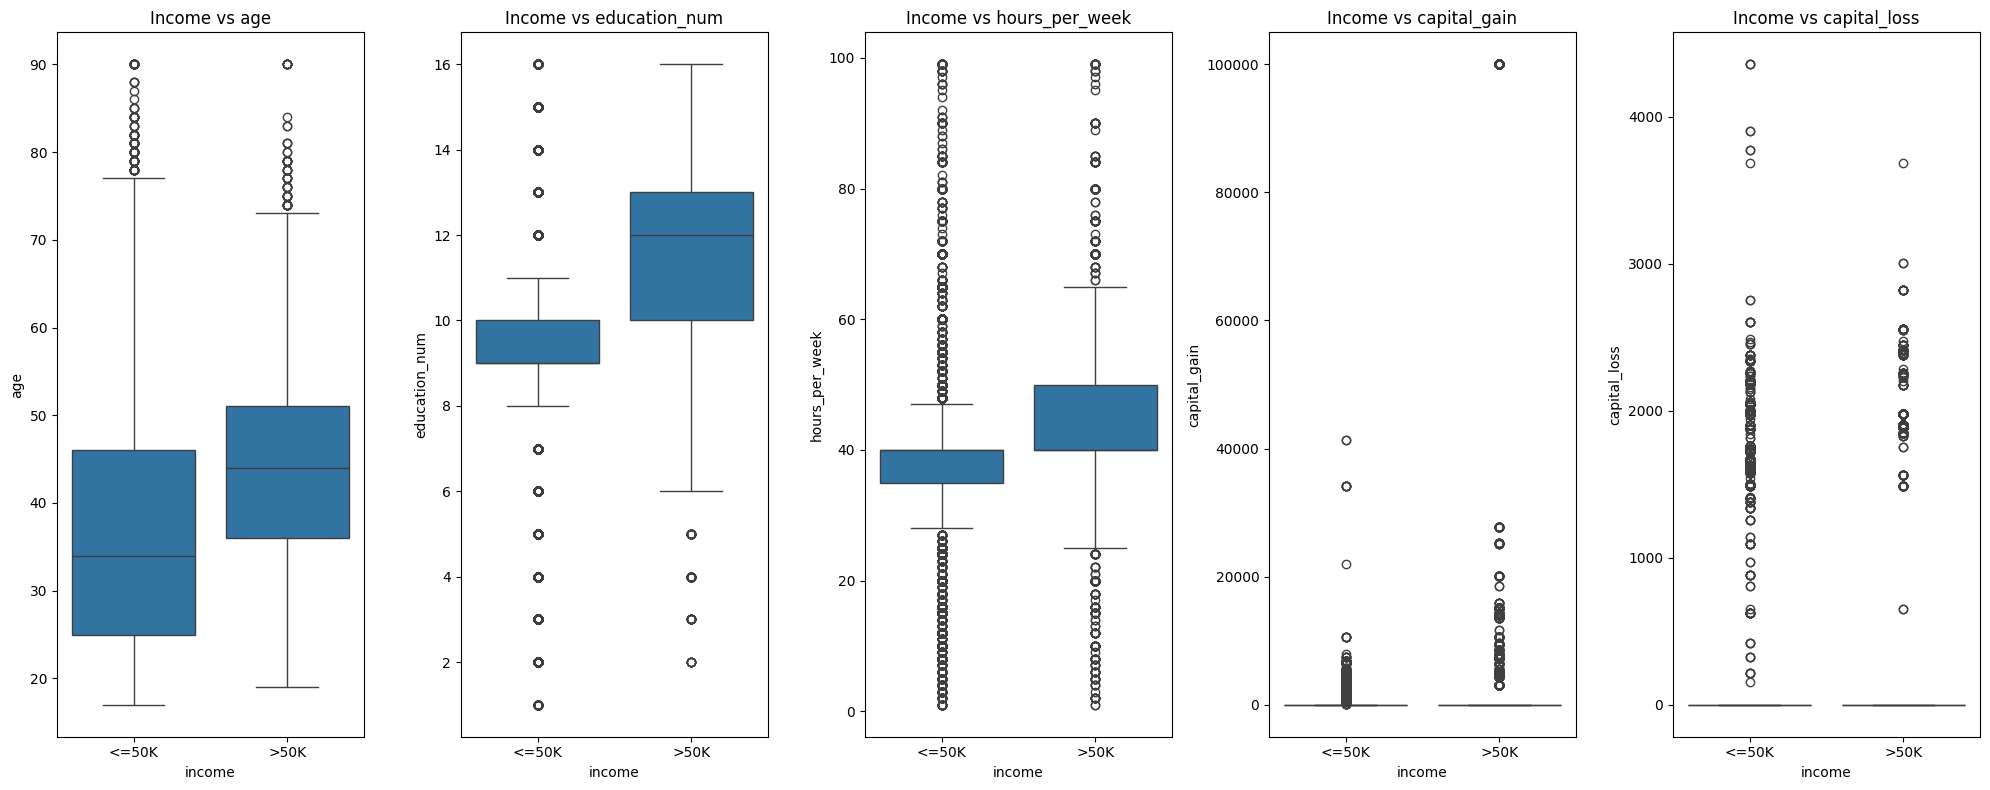

In [10]:
# Columns to plot
columns_to_plot = ['age', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss']

# Set up the matplotlib figure
plt.figure(figsize=(20, 8))

# Create subplots
for i, col in enumerate(columns_to_plot):
    ax = plt.subplot(1, len(columns_to_plot), i + 1)  # 1 row, n columns, ith subplot
    sns.boxplot(x='income', y=col, data=data, ax=ax)
    ax.set_title(f'Income vs {col}')

# Adjust layout for better fit
plt.tight_layout()
plt.show()


Analýza naznačuje potenciálně důležité atributy pro budoucí úkoly, zejména pro klasifikaci příjmů.

- **Vzdělání:** Byla zjištěna korelace mezi délkou vzdělání a příjmem. Pokud má člověk alespoň nějaký vysokoškolský titul pak má daleko větší šanci mít s příjmy nad $50K, což naznačuje význam vzdělání pro ekonomické výsledky.

- **Odpracované hodiny:** Počet odpracovaných hodin týdně se zdá být dalším faktorem ovlivňujícím příjem, přičemž delší pracovní doba často indikuje vyšší příjmy.

- **Věk:** Věk také vykazuje slabou korelaci s příjmem, což naznačuje, že by mohl být užitečný k dalšímu zkoumání v predikčních modelech.

**Dopady**

Tyto pozorování naznačují, že vzdělání, odpracované hodiny a věk by mohly být hodnotnými vlastnostmi v budoucích analýzách zaměřených na pochopení úrovní příjmů. Jejich zahrnutí by mohlo zlepšit přesnost a relevanci snah o shlukování a poskytnout poznatky o tom, jak určité socioekonomické faktory ovlivňují příjem.


#### Vizualizace kategorických atributů

Přehled distribuce kategorických atributů

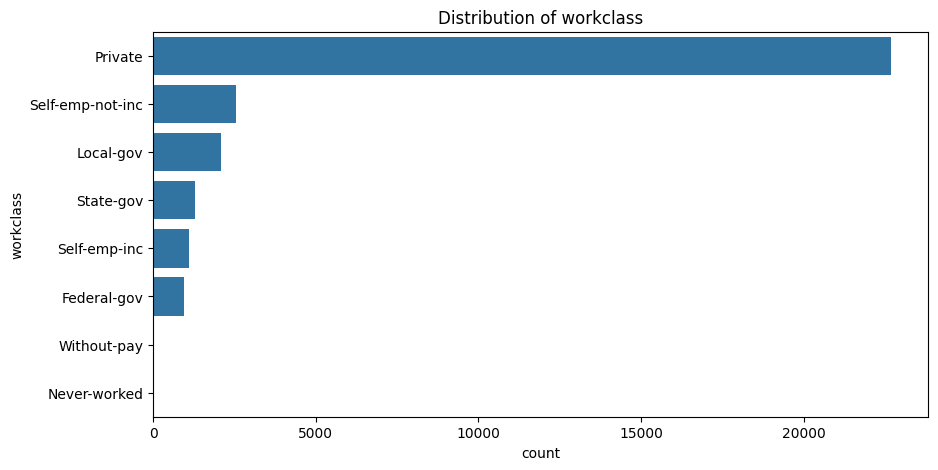

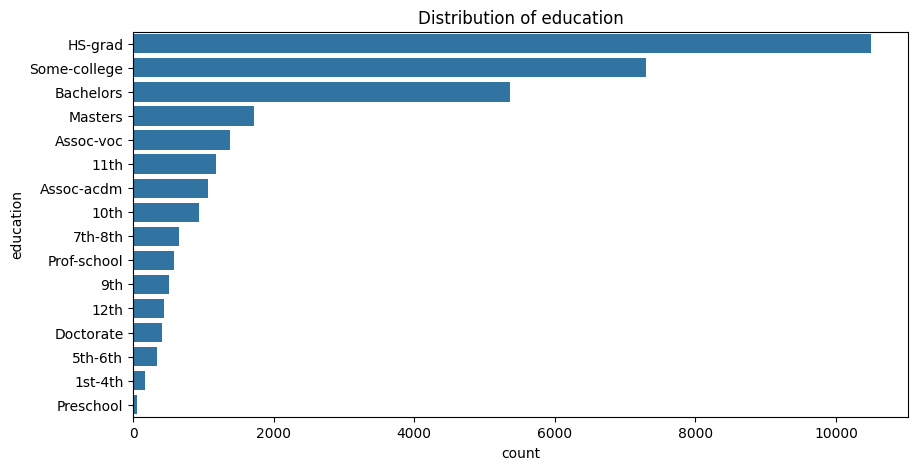

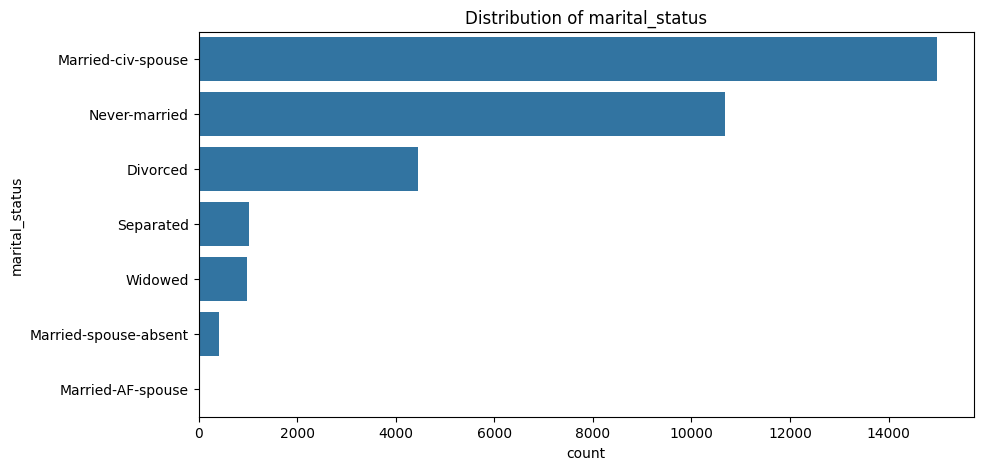

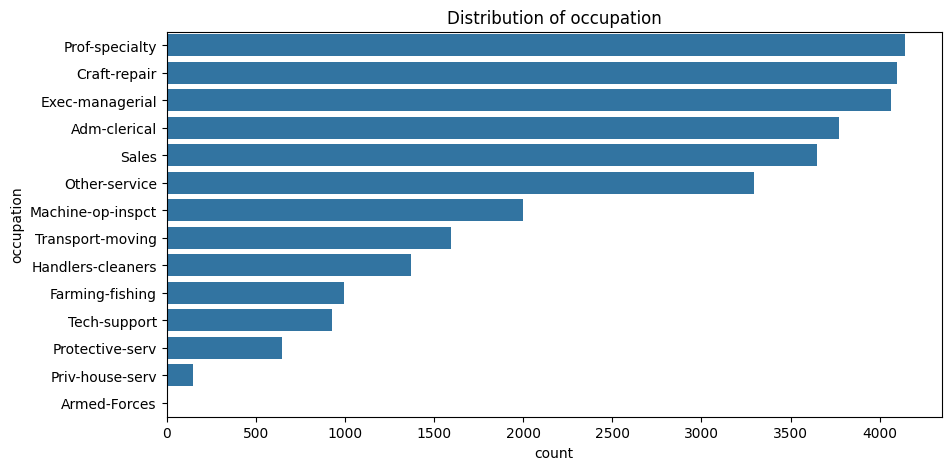

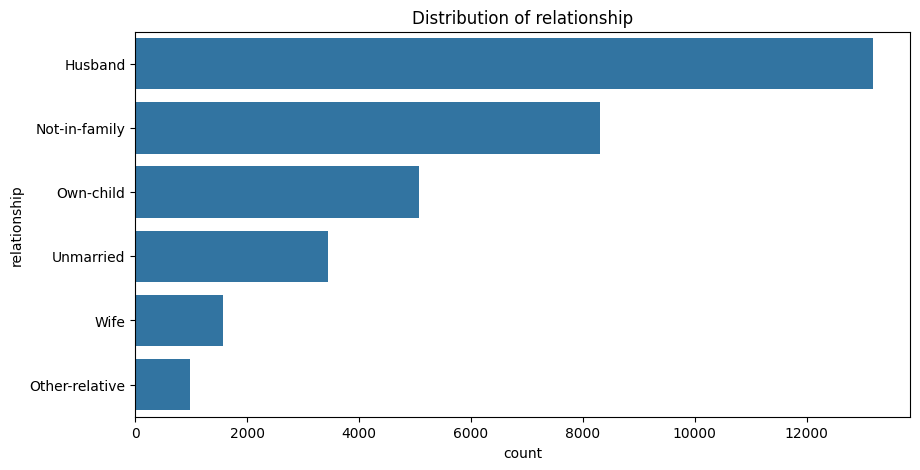

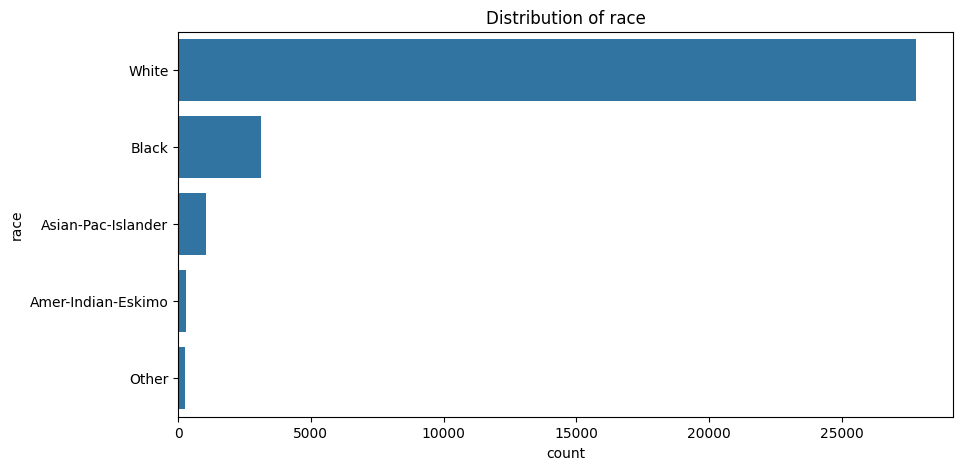

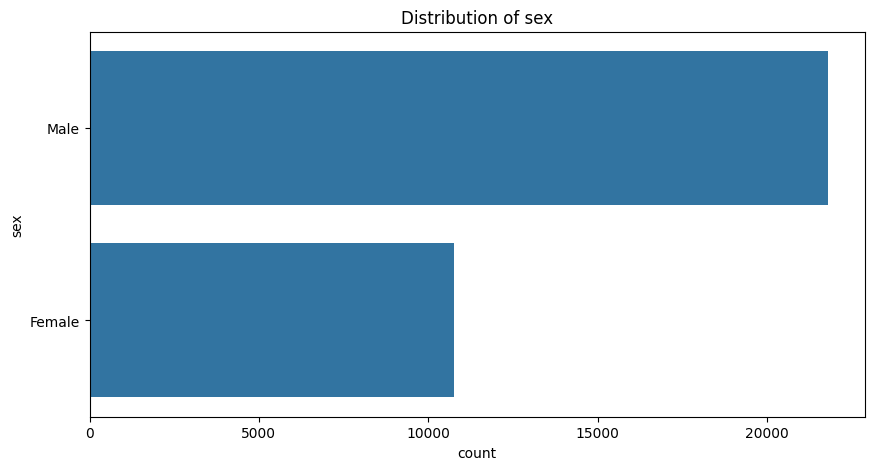

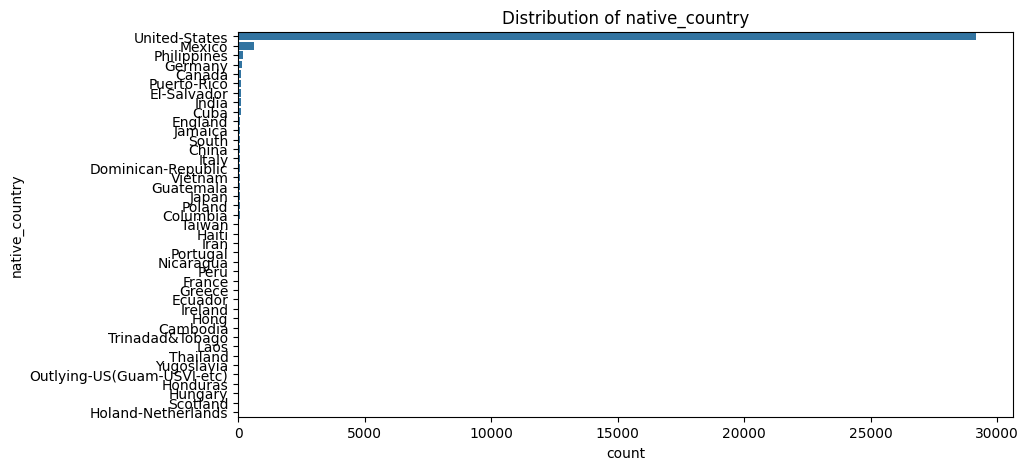

In [11]:
for col in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=data, order = data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


## 3. Data preparation


#### Ošetření chybějicích hodnot (null)
Vlastnosti workclass, occupation a native_country obsahují chybějící hodnoty ("?"), které je potřeba ošetřit.


In [14]:
data.replace('?', np.NaN, inplace = True)
nan_counts = data.isnull().sum()
print(nan_counts)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [15]:
data.fillna(method = 'ffill', inplace = True)
nan_counts = data.isnull().sum()
print(nan_counts)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


<ipython-input-15-b0f2229ea8c7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method = 'ffill', inplace = True)


Úspěšně jsme v naší datové sadě nahradili znaky '?' za hodnoty null a potvrdili tyto změny.

Pro zpracování těchto null hodnot jsme použili metodu 'forward fill'. Tato technika doplňuje chybějící hodnoty poslední známou nenulovou hodnotou ve sloupci.


#### Kódování kategorických proměnných


Abychom připravili dataset pro klastrování, zakódujeme kategorické proměnné:

- **One-Hot Encoding:** Použito pro všechny kategorie kromě `education`. Tato metoda je ideální pro kategorické proměnné, které většinou nemají specifické pořadí.

- **Ordinální kódování pro vzdělání:** Proměnná `education` je zakódována ordinálně, aby reflektovala její přirozenou hierarchii. To uznává, že vyšší úroveň vzdělání může korelovat s vyššími příjmy. Rychlost dosažení vzdělání může také ovlivnit úroveň příjmů.

### Proč je to důležité

Tato strategie má za cíl zlepšit klastrování přesným zachycením vlivu vzdělání na příjem. Tím, že se vzdělání zpracovává odlišně, získáváme jasnější obraz jeho role v ekonomických výsledcích.

In [16]:
df = data.copy()

le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['education'] = le.fit_transform(df['education'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native_country'] = le.fit_transform(df['native_country'])
df['income'] = le.fit_transform(df['income'])

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


### Korelační analýza

<Axes: >

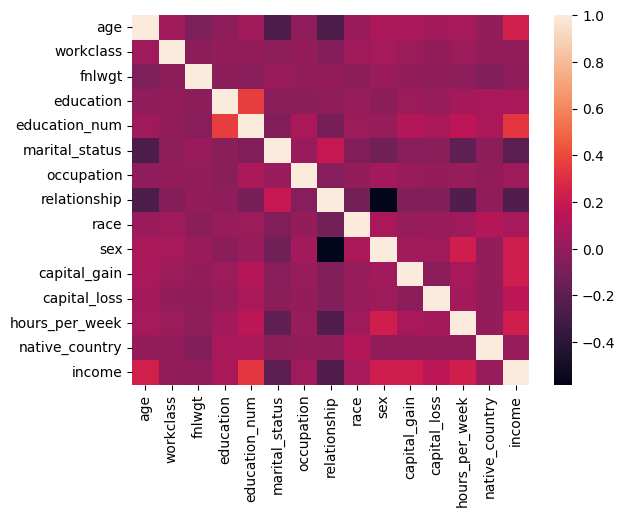

In [17]:
sns.heatmap(df.corr())

<Axes: >

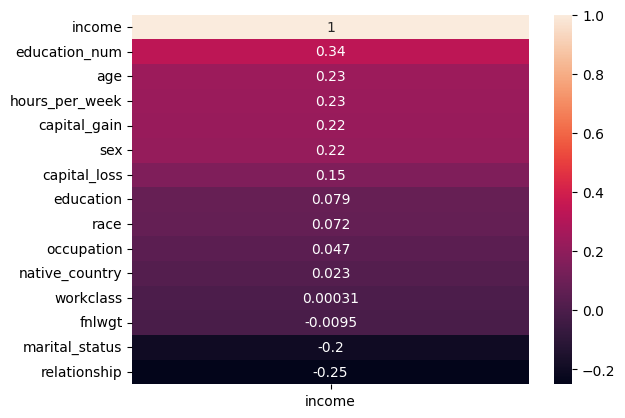

In [18]:
corr = df.corr()[['income']].sort_values(by='income', ascending=False)
sns.heatmap(corr, annot=True)

In [19]:
corr

,income
income,1.000000
education_num,0.335154
age,0.234037
hours_per_week,0.229689
capital_gain,0.223329
sex,0.215980
capital_loss,0.150526
education,0.079317
race,0.071846
occupation,0.047066


Korelační heatmapa efektivně zvýrazňuje proměnné, které jsou nejvíce spojené s příjmem. Věk a dosažené vzdělání se ukazují jako významně korelované, což zdůrazňuje jejich vliv na úroveň příjmu. Podobně pohlaví, kapitálové zisky a počet odpracovaných hodin týdně vykazují silné vazby na příjem. Naopak manželský stav a partnerské vztahy vykazují výrazně slabší korelaci, což naznačuje, že tyto faktory hrají menší roli při ovlivňování příjmů.


In [20]:
categorical_features = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
data_encoded = pd.get_dummies(data.drop('education', axis=1), columns=categorical_features)

# Encode income
lEncoder = LabelEncoder()
data_encoded['income'] = lEncoder.fit_transform(data['income'])

# Define the mapping for education levels
education_mapping = {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-voc': 10,
    'Assoc-acdm': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Prof-school': 14,
    'Doctorate': 15
}

# Apply the mapping to the education column
data_encoded['education_ordinal'] = data['education'].map(education_mapping)

data_encoded


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,education_ordinal
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,True,False,False,12
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,True,False,False,12
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,True,False,False,8
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,True,False,False,6
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,False,False,False,...,False,False,False,False,False,False,True,False,False,11
32557,40,154374,9,0,0,40,1,False,False,False,...,False,False,False,False,False,False,True,False,False,8
32558,58,151910,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,True,False,False,8
32559,22,201490,9,0,0,20,0,False,False,False,...,False,False,False,False,False,False,True,False,False,8


#### Škálování numerických proměnných

Původně jsem zvažoval použití Standard Scaleru, ale nakonec byl zvolen Min-Max Scaler díky své vhodnosti pro data, která nemají Gaussovo rozložení.


In [21]:
#scaler = StandardScaler()
scaler = sklearn.preprocessing.MinMaxScaler()
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])
data_encoded #Encoded, scalled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,education_ordinal
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0,False,False,False,...,False,False,False,False,False,False,True,False,False,12
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0,False,False,False,...,False,False,False,False,False,False,True,False,False,12
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0,False,False,False,...,False,False,False,False,False,False,True,False,False,8
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0,False,False,False,...,False,False,False,False,False,False,True,False,False,6
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0,False,False,False,...,False,False,False,False,False,False,False,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0,False,False,False,...,False,False,False,False,False,False,True,False,False,11
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,1,False,False,False,...,False,False,False,False,False,False,True,False,False,8
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0,False,False,False,...,False,False,False,False,False,False,True,False,False,8
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0,False,False,False,...,False,False,False,False,False,False,True,False,False,8


#### Příprava finálního datasetu pro klastrování

Pro analýzu klastrování odstraňujeme proměnné `income` a `fnlwgt`. `Income` by zjevně zkresloval klastrování směrem k očekávaným výsledkům, které hledáme, a `fnlwgt` dle mého názoru není relevantní a mohl by vnášet zkreslení do dat.


In [22]:
df = data_encoded.drop('fnlwgt', axis=1)

X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

### Shrnutí Anylýzy dat

Aalýza dat datasetu Adult odhaluje klíčové socioekonomické poznatky, které tvoří základ pro hlubší analýzu:

- **Demografie a vzdělání:** Data jsou zaměřena na jedince ve věku 24–50 let, převážně s 9–10 lety vzdělání. Tato demografická skupina představuje pracovní sílu na vrcholu kariéry, což zdůrazňuje význam vzdělání v socioekonomických studiích.

- **Rozdělení příjmů:** Rozdělení existuje mezi těmi, kdo vydělávají nad a pod $50K, přičemž tento rozdíl je spojen s délkou vzdělání a počtem odpracovaných hodin týdně. Vysoce vydělávající jedinci obvykle mají více než 10 let vzdělání a pracují delší hodiny, což podtrhuje roli vzdělání a pracovní etiky v dosažení finančního úspěchu.

- **Kapitálové zisky a ztráty:** Většina účastníků nemá žádné kapitálové zisky ani ztráty, což poukazuje na omezenou investiční aktivitu. Nicméně u vysoce příjmových jedinců jsme zaznamenali vyšší investiční aktivitu.

- **Charakteristiky dat:** Rozložení věku je šikmé doleva, což odráží mladší populaci. Dataset převážně reprezentuje bělochy, ženaté muže v soukromém sektoru, což naznačuje specifické socioekonomické podmínky.

- **Příprava pro klastrování:** Vzhledem k nerovnoměrnému rozložení prvků jsme zvolili škálování Min-Max pro zajištění jednotnosti při analýze dat. Abychom předešli zkreslení při klastrování, byly proměnné `income` a `fnlwgt` vyloučeny, protože přímo či nepřímo ovlivňují výsledky klastrování.

Tato analýza nejen identifikuje klíčové vzorce a potenciální zkreslení, ale také určuje kroky předzpracování pro klastrování, čímž zajišťuje pevný základ pro modelování a odvozování poznatků o úrovně příjmu.



## 4. Modelování

### Shlukovací analýza

Provedeme shlukovací analýzu za pomocí K-means Clustering.

In [23]:
def showPlots(data, numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist(), n_clusters=3):
    for column in numerical_features:
        # Calculate mean values for the barplot
        means = data.groupby('Cluster')[column].mean().reset_index()

        # Set up a figure with two subplots (side by side)
        plt.figure(figsize=(20, 6))  # Increase the total figure size

        # Boxplot on the left
        plt.subplot(1, 2, 1)  # (rows, columns, plot number)
        sns.boxplot(x='Cluster', y=column, data=data)
        plt.title(f'Boxplot of {column} by Cluster')

        # Barplot on the right
        plt.subplot(1, 2, 2)  # (rows, columns, plot number)
        sns.barplot(x='Cluster', y=column, data=means)  # Use the calculated means
        plt.title(f'Mean of {column} Across Clusters')

        plt.show()

#### Nalezení optimálního počtu klastrů

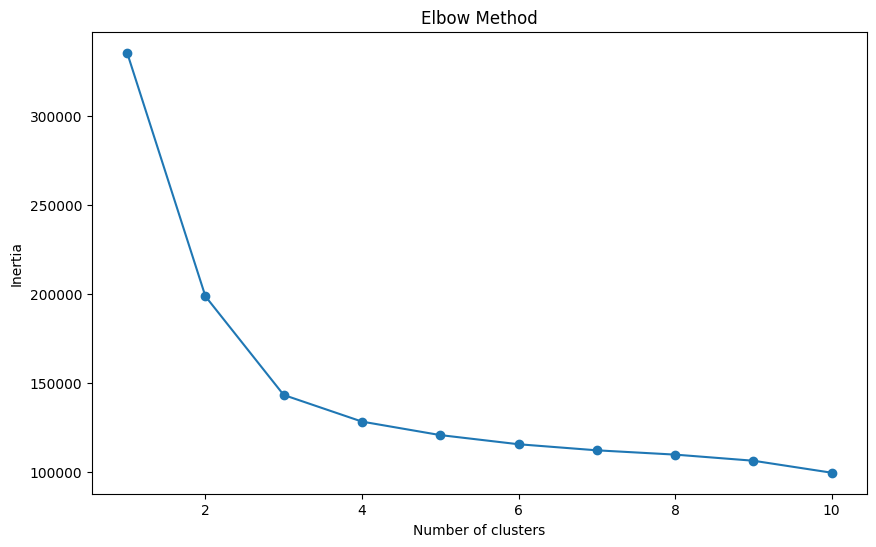

In [24]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Analýza grafu naznačuje, že optimální počet klastrů (K) pro naši analýzu je pravděpodobně 3, přičemž 2 je také možnou alternativou.

Optimální počet klastrů jsme nalezli pomocí "Elbow method"


#### Provedení shlukování

Shlukování provádíme za použítí K=3,což je počet klastrů neboli shluků.





In [25]:
n_clusters = 3

In [26]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster information to the dataset
data['Cluster'] = clusters

#### Analýza vytvořených klastrů

Distribuce klastrů:

In [27]:
# Count the number of instances in each cluster
cluster_counts = data['Cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)

Cluster Distribution:
Cluster
1    19607
0     9134
2     3820
Name: count, dtype: int64


Distribuce podle příjmu v %:

In [28]:
for i in range(n_clusters):
    cluster = data[data['Cluster'] == i]
    income_distribution = cluster['income'].value_counts(normalize=True) * 100
    print(f"Cluster {i} Income Distribution:")
    print(income_distribution)


Cluster 0 Income Distribution:
income
<=50K    54.302606
>50K     45.697394
Name: proportion, dtype: float64
Cluster 1 Income Distribution:
income
<=50K    82.373642
>50K     17.626358
Name: proportion, dtype: float64
Cluster 2 Income Distribution:
income
<=50K    94.47644
>50K      5.52356
Name: proportion, dtype: float64


#### Výsledky K-Means shlukování se 3 shluky

Výsledky shlukování naznačují jasné rozdělení příjmů mezi třemi shluky:

- **Shluk 0** se jeví jako smíšená skupina s relativně vyváženým rozdělením příjmů, kde přibližně 45,70 % jedinců má příjem vyšší než 50K.
- **Shluk 1** obsahuje většinu jedinců s příjmem <=50K, ale stále významnou část (17,63 %) s příjmem vyšším než 50K, což naznačuje skupinu s nižšími středními příjmy.
- **Shluk 2** je převážně složen z jedinců s příjmem <=50K a představuje skupinu s nejnižšími příjmy v datasetu.



In [29]:
for i in range(n_clusters):
    cluster = data[data['Cluster'] == i]
    print(f"Cluster {i} Summary:")
    display(cluster.describe())
    # Add more detailed analysis per cluster

Cluster 0 Summary:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Cluster
count,9134.000000,9.134000e+03,9134.000000,9134.000000,9134.000000,9134.000000,9134.0
mean,40.463652,1.869233e+05,13.333589,2460.297898,138.212174,43.098642,0.0
std,12.017358,1.029672e+05,0.923823,11776.972996,504.196752,12.228759,0.0
min,18.000000,1.487800e+04,12.000000,0.000000,0.000000,1.000000,0.0
25%,31.000000,1.165395e+05,13.000000,0.000000,0.000000,40.000000,0.0
50%,39.000000,1.767775e+05,13.000000,0.000000,0.000000,40.000000,0.0
75%,48.000000,2.315480e+05,14.000000,0.000000,0.000000,50.000000,0.0
max,90.000000,1.455435e+06,16.000000,99999.000000,3683.000000,99.000000,0.0


Cluster 1 Summary:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Cluster
count,19607.000000,1.960700e+04,19607.000000,19607.000000,19607.000000,19607.000000,19607.0
mean,37.594074,1.889180e+05,9.490743,588.270312,70.221095,39.901719,1.0
std,13.520346,1.059340e+05,0.659602,4778.805030,359.935904,11.929101,0.0
min,17.000000,1.228500e+04,8.000000,0.000000,0.000000,1.000000,1.0
25%,26.000000,1.175900e+05,9.000000,0.000000,0.000000,40.000000,1.0
50%,36.000000,1.777730e+05,9.000000,0.000000,0.000000,40.000000,1.0
75%,47.000000,2.359475e+05,10.000000,0.000000,0.000000,43.000000,1.0
max,90.000000,1.484705e+06,11.000000,99999.000000,4356.000000,99.000000,1.0


Cluster 2 Summary:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Cluster
count,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.0
mean,39.150524,201020.996597,5.330628,283.441623,53.257853,36.824084,2.0
std,16.990952,108939.614708,1.578978,3107.394277,320.136221,13.423059,0.0
min,17.000000,19752.000000,1.000000,0.000000,0.000000,1.000000,2.0
25%,24.000000,125361.250000,4.000000,0.000000,0.000000,30.000000,2.0
50%,37.000000,187223.500000,6.000000,0.000000,0.000000,40.000000,2.0
75%,53.000000,251989.000000,7.000000,0.000000,0.000000,40.000000,2.0
max,90.000000,806316.000000,7.000000,99999.000000,3900.000000,99.000000,2.0


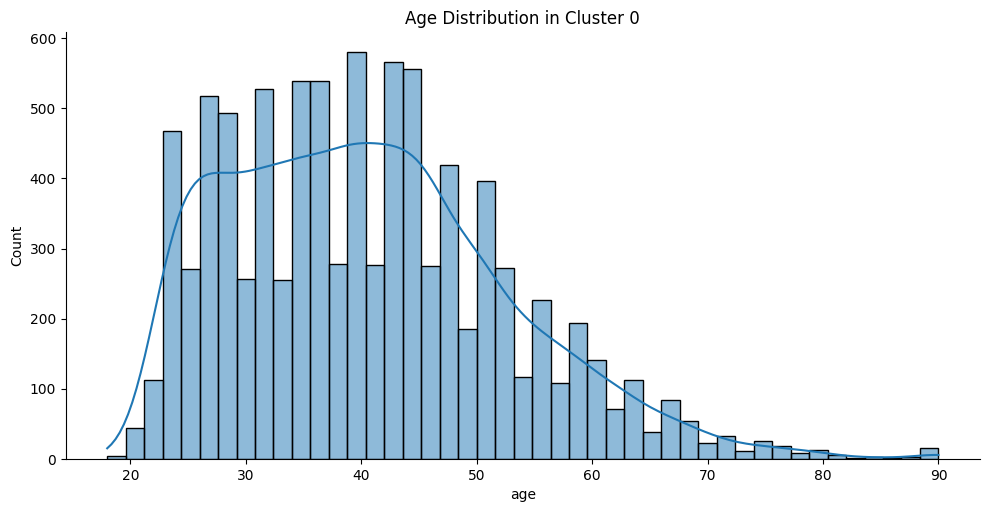

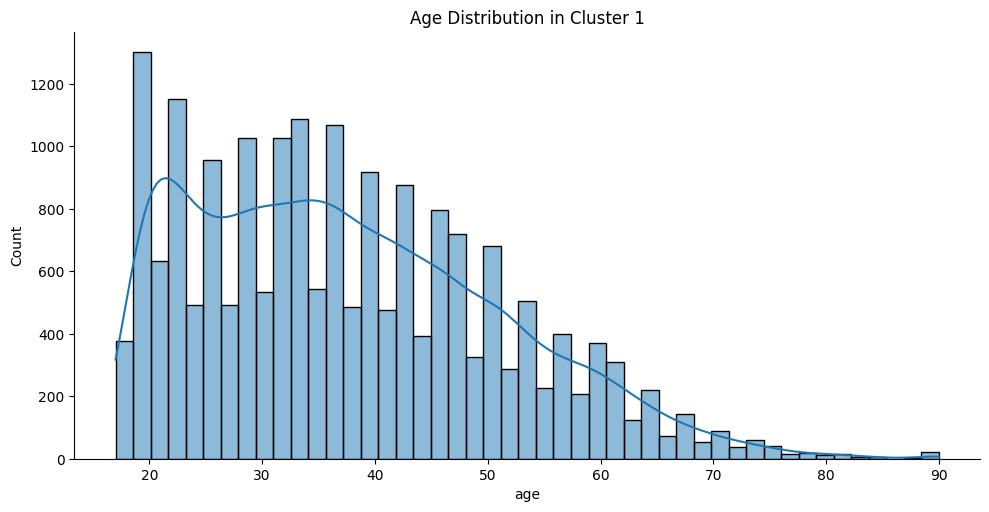

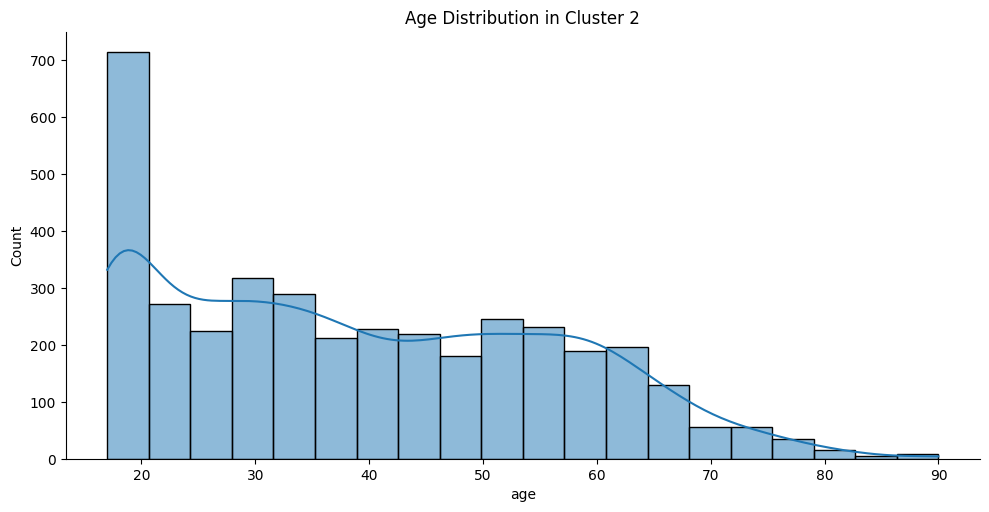

In [30]:
# For example, comparing age distribution in each cluster
for i in range(n_clusters):
    sns.displot(data[data['Cluster'] == i], x='age', kde=True, aspect=2)
    plt.title(f'Age Distribution in Cluster {i}')
    plt.show()


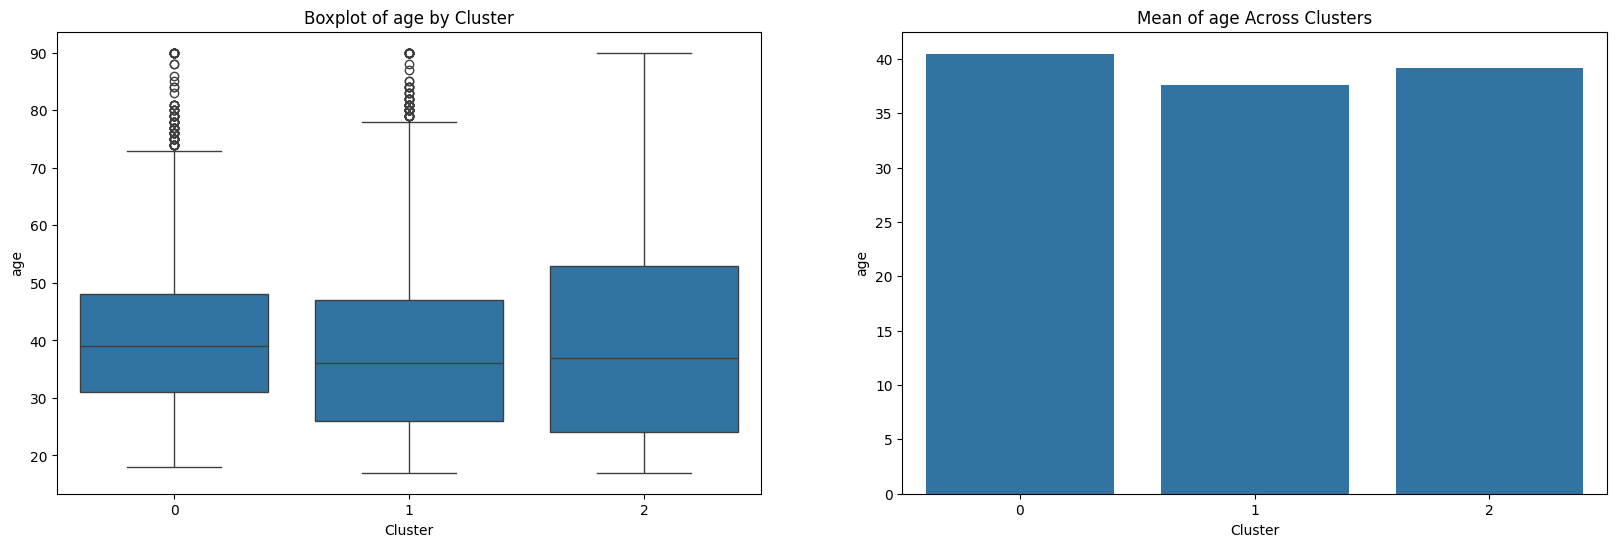

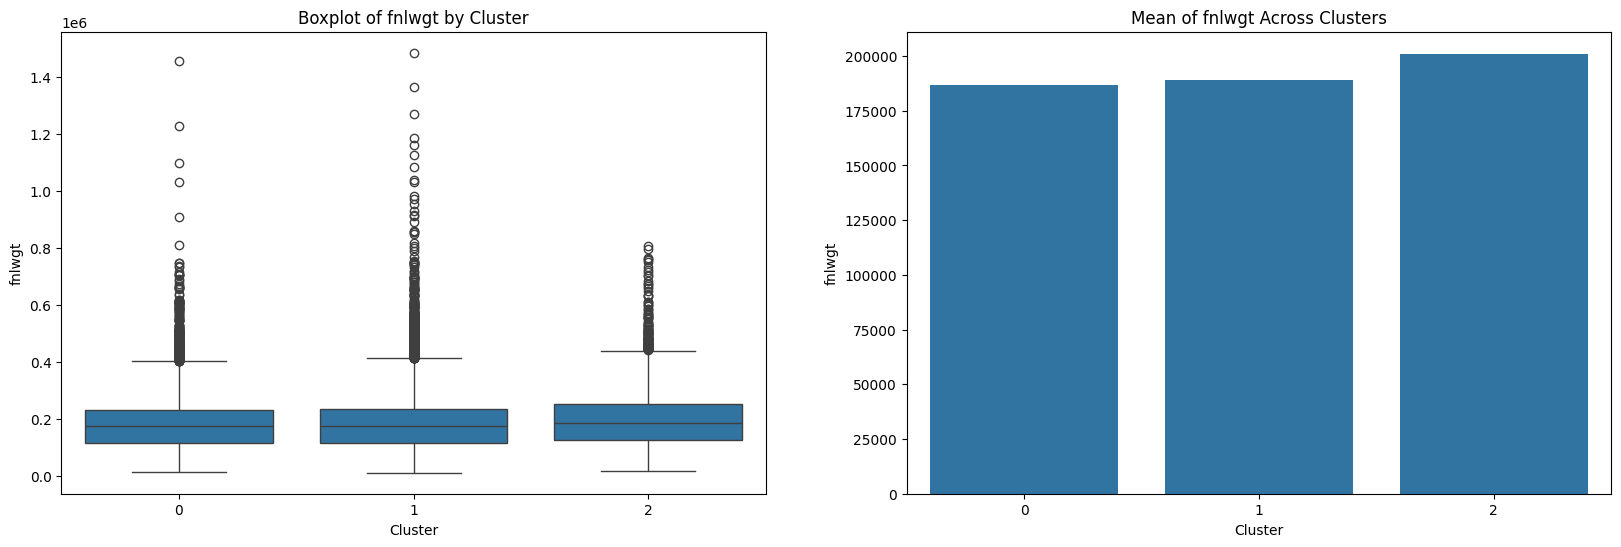

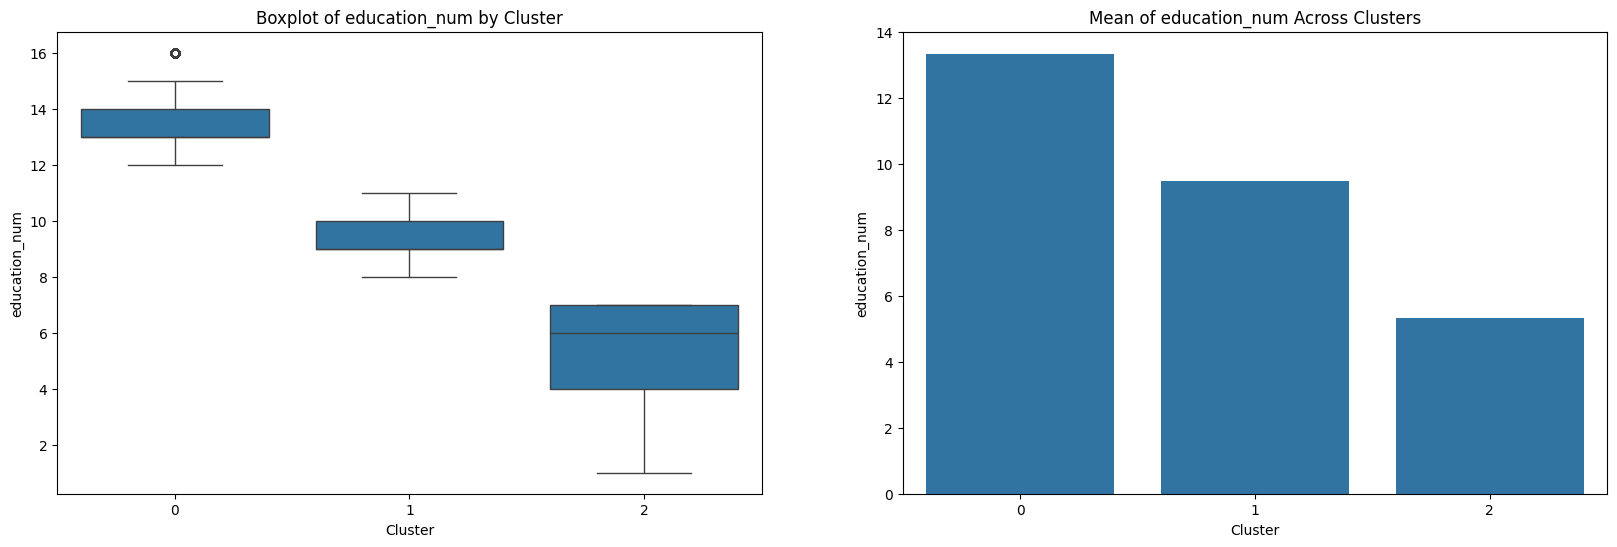

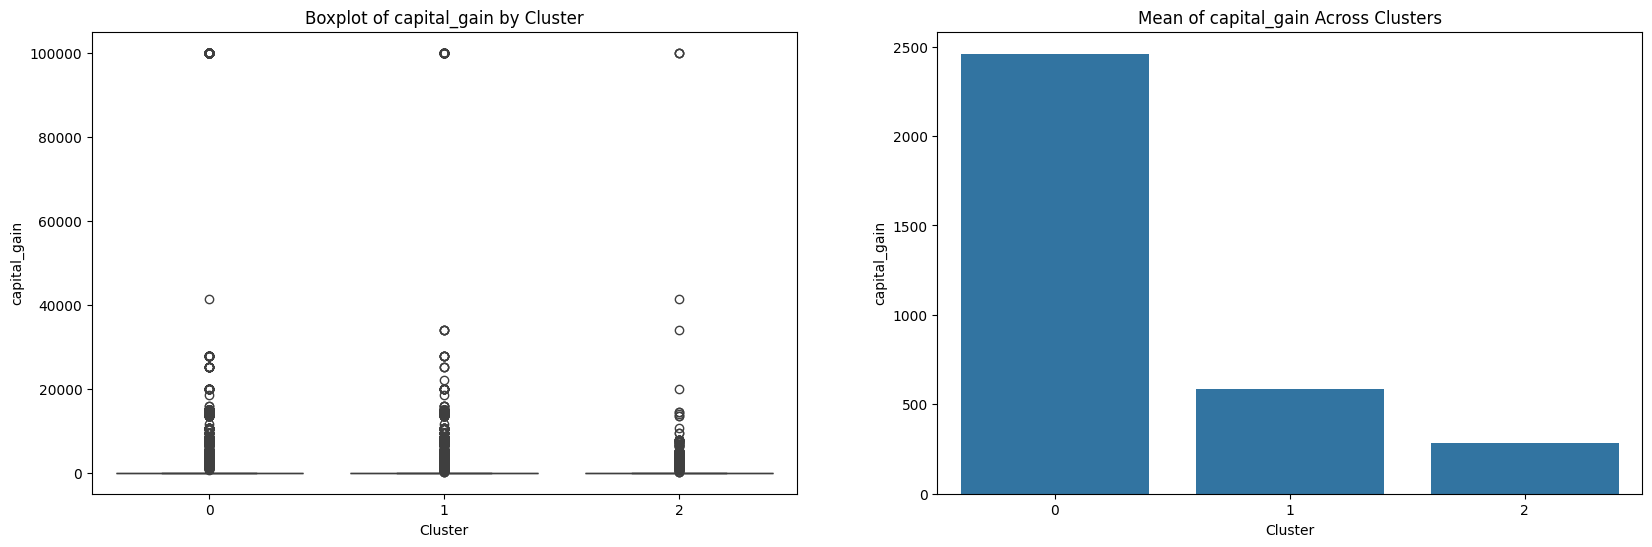

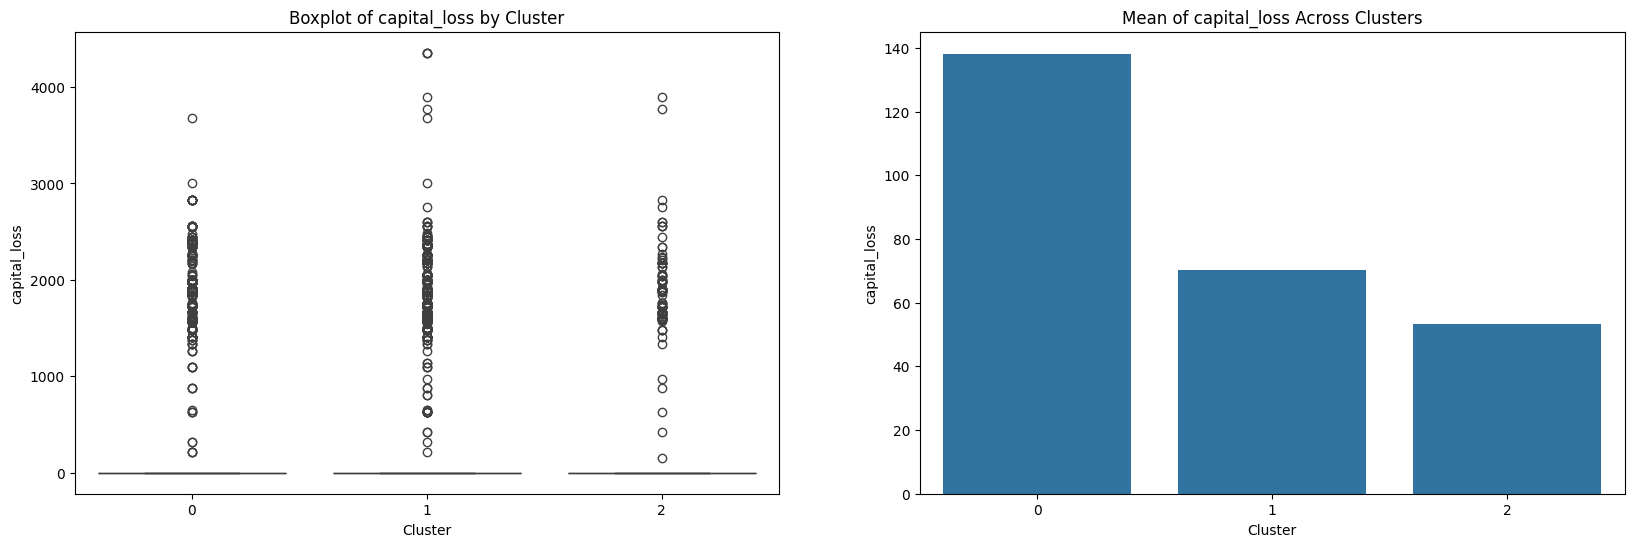

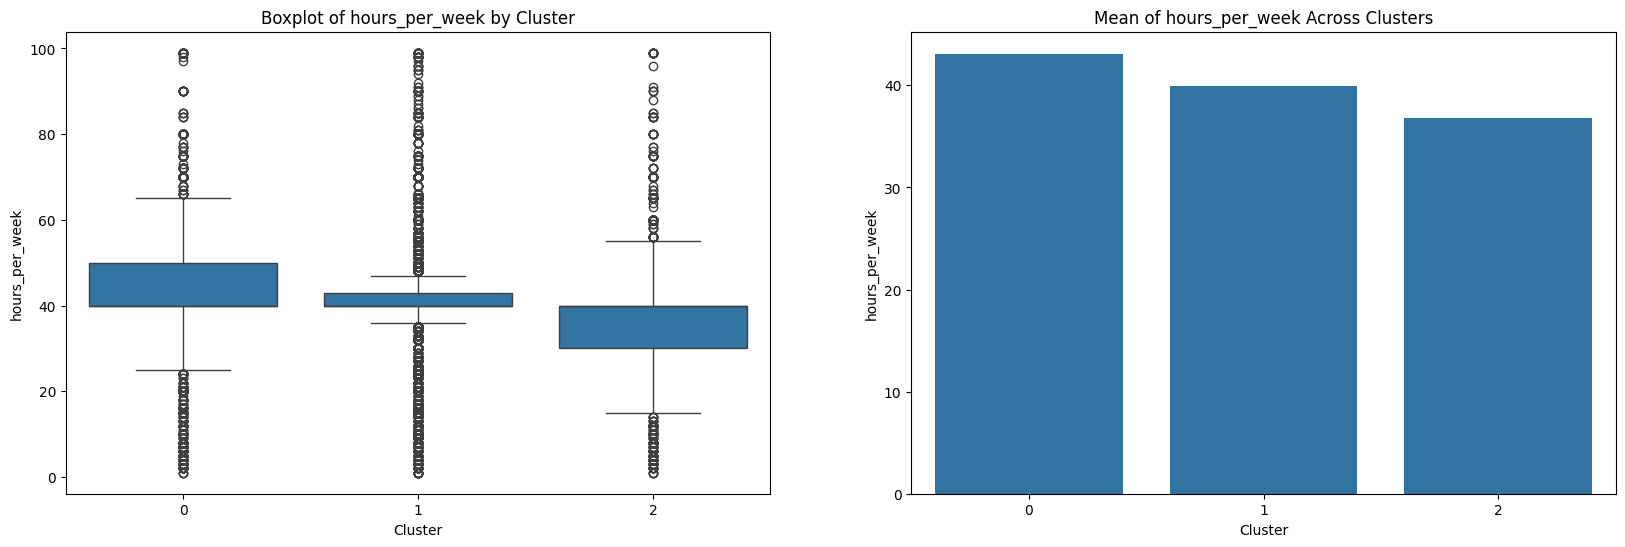

In [31]:
# Creating boxplots for each feature across clusters
showPlots(data, n_clusters = n_clusters)

Výsledky shlukování potvrzují klíčovou roli vzdělání a pracovních hodin při rozlišování mezi shluky:

- **Shluk 0:** Vykazuje nejvyšší úroveň vzdělání a týdenních pracovních hodin, což naznačuje vysoce vzdělanou a pracovitou skupinu.
- **Shluk 1:** Obsahuje střední úroveň vzdělání a o něco méně průměrných pracovních hodin, což ukazuje na středně vzdělanou a středně pracující demografickou skupinu.
- **Shluk 2:** Má nejnižší úroveň vzdělání a nejméně odpracovaných hodin týdně, což poukazuje na skupinu s minimálním dosaženým vzděláním a zapojením do práce.

Tato zjištění podtrhují významnou korelaci mezi vzděláním, pracovní angažovaností a segmentací shluků.


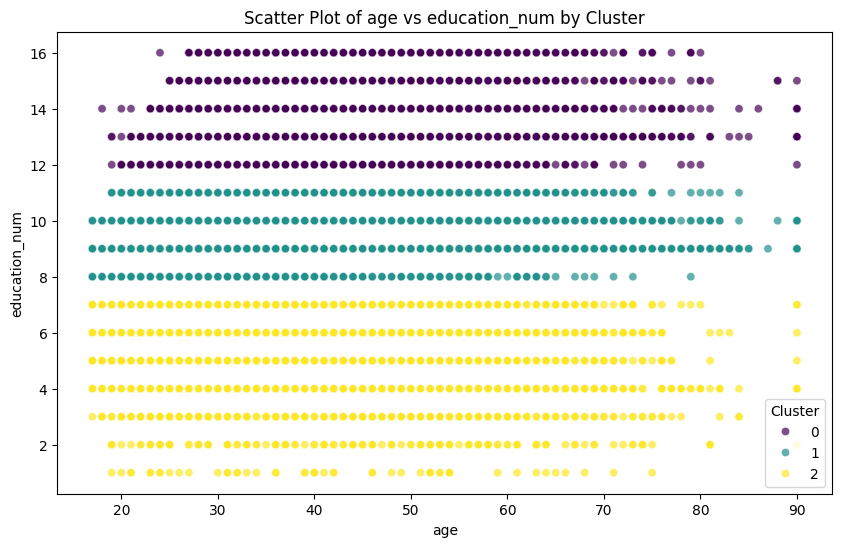

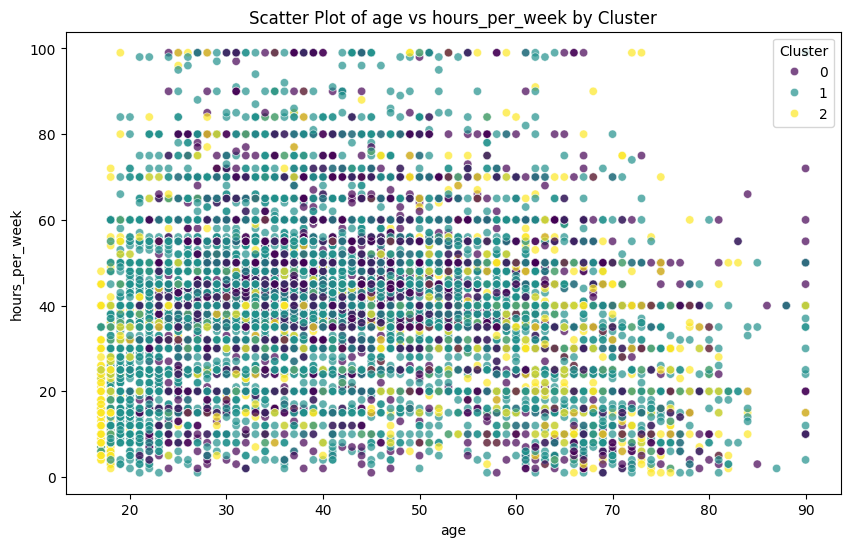

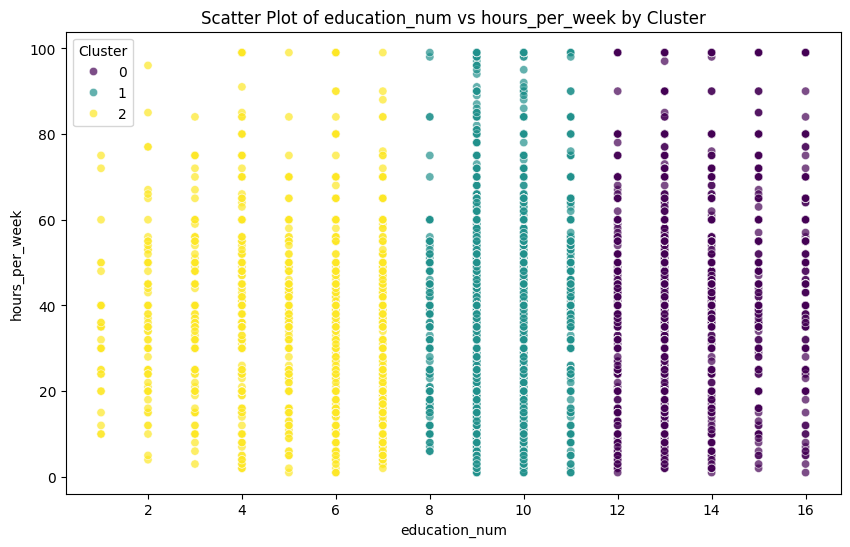

In [32]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='education_num', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of age vs education_num by Cluster')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='hours_per_week', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of age vs hours_per_week by Cluster')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='education_num', y='hours_per_week', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of education_num vs hours_per_week by Cluster')
plt.legend(title='Cluster')
plt.show()


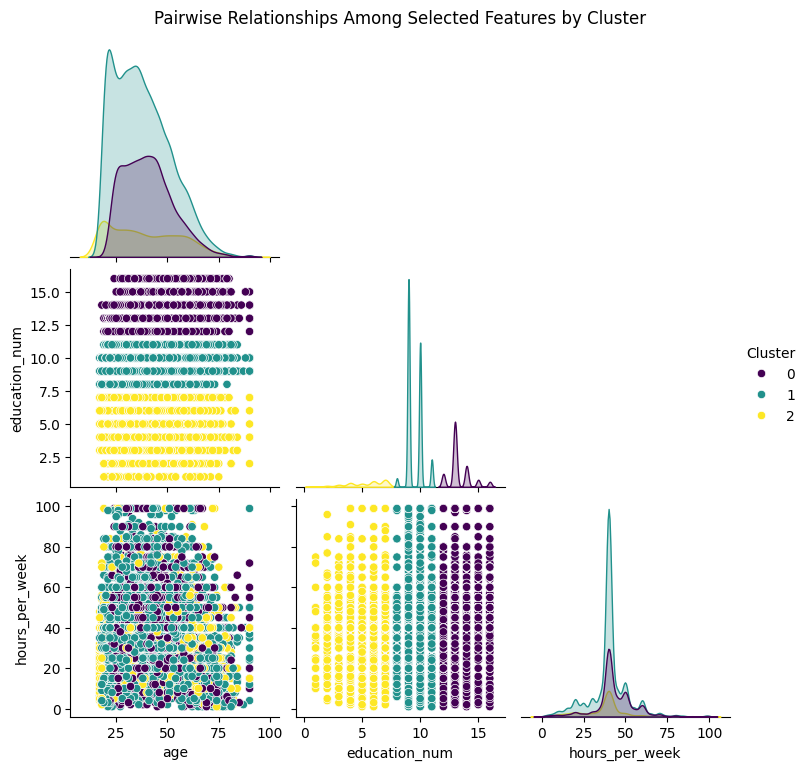

In [33]:
# Assuming 'data' is your DataFrame containing the Adult dataset with cluster assignments
features_to_plot = ['age', 'education_num', 'hours_per_week', 'Cluster']  # Example feature set

sns.pairplot(data[features_to_plot], hue='Cluster', palette='viridis', corner=True)
plt.suptitle('Pairwise Relationships Among Selected Features by Cluster', y=1.02)
plt.show()


#### Shrnutí analýzy shluků

Analýza shlukování metodou K-means rozděluje dataset do odlišných socioekonomických skupin, přičemž **úroveň vzdělání** a **pracovní hodiny** jsou hlavními faktory.

- **Shluk 0** - Vysoké příjmy, smíšená skupina - 45,70 % nad \$50K  
  - Reprezentuje jedince s **nejvyšší úrovní vzdělání** a příjmu.  
  - Naznačuje silnou pozitivní korelaci mezi vyšším vzděláním a vyššími příjmy.  
  - Obsahuje jedince s **nejvíce odpracovanými hodinami**, což svědčí o plných pracovních úvazcích.  

- **Shluk 1** - Nižší střední příjmy - 17,63 % nad \$50K  
  - Členové mají **střední úroveň vzdělání**, nižší než ve Shluku 0.  
  - Příjmy většinou nepřesahují \$50K.  
  - Tento shluk zahrnuje **méně odpracovaných hodin** než Shluk 0, což může odrážet práci s nižším hodinovým zapojením.  

- **Shluk 2** - Nejnižší příjmy  
  - Obsahuje jedince s **nejkratším dosaženým vzděláním** v rámci studované populace.  
  - Jedná se o skupinu s **nejnižšími příjmy** a méně odpracovanými hodinami.  

Data ukazují, že **vzdělání je klíčovým faktorem** při určování příjmů a pracovní hodiny také vykazují vztah, jak bylo pozorováno ve shlucích.


### Model training preparation

#### Vybrané výkonnostní metriky modelu

- **Přesnost (Accuracy):** Poskytuje základní přehled o tom, jak často model správně předpovídá příjmy v obou kategoriích.
- **Precision a Recall:** Vzhledem k **nevyváženosti** mezi třídami příjmů >50K a <=50K jsou tyto metriky zásadní.
  - **Precision** pomáhá pochopit přesnost předpovědí pro třídu s vyšším příjmem, která je zvláště důležitá.
  - **Recall** je klíčový pro zajištění, že model efektivně identifikuje co nejvíce skutečných případů příjmů >50K.
- **F1-Score:** Tato metrika je obzvláště důležitá, protože poskytuje rovnováhu mezi **Precision** a **Recall**, což je zásadní v kontextu našeho **nevyváženého** datasetu. Zajišťuje, že žádné měřítko není upřednostňováno před druhým, ale že model vykazuje dobrý výkon podle obou kritérií.

**Nejdůležitější metrika:**
Vzhledem k nevyváženosti tříd a významu přesného určení jedinců s příjmem >50K je **F1-Score** nejdůležitější metrikou pro tento projekt. Poskytuje vyvážený pohled na precision i recall, což z něj činí nejlepší jednotné měřítko výkonnosti modelu.


#### Cross-validation Preparation

Zvolili jsme Stratified k-Fold cross validation, protože náš dataset obsahuje nevyvážené třídy. Tato metoda zajišťuje, že každý fold odráží celkové rozložení tříd v datasetu, což poskytuje spravedlivé a přesné hodnocení modelu.

Zvolili jsme konfiguraci s 5 foldy, která nabízí dobrý kompromis mezi důkladností hodnocení a výpočetní efektivitou. Toto nastavení bude konzistentně používáno napříč všemi modely, aby byla zajištěna srovnatelnost výsledků.


In [34]:
from sklearn.model_selection import StratifiedKFold

# Initialize the StratifiedKFold object for later use
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### Inicializace

In [47]:
# Create an empty DataFrame for results
results_df = None
results_df = pd.DataFrame(columns=['Algorithm', 'Best Score (F1)', 'Accuracy', 'Precision','Recall','F1-Score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def PerformAndEvaluateGridSeachFit(classifier, param_grid, classifier_name, scoring_metric='f1', top_n=None):
    print(f"Executing PerformAndEvaluateGridSeachFit for {classifier_name} ...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=skf, scoring=scoring_metric, verbose=1)
    print("Started GridSearch Fit ...")
    grid_search.fit(X_train, y_train)
    print("Done\n")

    # Accessing cv_results_ to create a DataFrame of results
    results = pd.DataFrame(grid_search.cv_results_)
    results = results.sort_values(by='rank_test_score').head(top_n)
    if top_n:
        results = results.sort_values(by='rank_test_score').head(top_n)
    else:
        results = results.sort_values(by='rank_test_score')

    # Selecting relevant columns to display
    columns_of_interest = ['rank_test_score', 'mean_test_score', 'std_test_score', 'mean_fit_time']
    display_results = results[columns_of_interest]
    display_results.columns = ['Rank', 'Mean F1 Score', 'Std F1 Score', 'Mean Fit Time (s)']

    # Display the top N performing parameter sets including time efficiency
    print(f"Top {top_n} performing parameter sets for {classifier_name} (Including time efficiency):")
    display(display_results)  # Use 'print(display_results.to_string())' if not in Jupyter Notebook


    # Best model evaluation
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate metrics on Test set
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1_score = f1_score(y_test, y_pred)

    # Prepare the new row as a dictionary
    new_row = {
        'Algorithm': classifier_name,
        'Score (F1)': f"{best_score:.4f}",
        'Accuracy': f"{test_accuracy:.4f}",
        'Precision': f"{test_precision:.4f}",
        'Recall': f"{test_recall:.4f}",
        'F1-Score': f"{test_f1_score:.4f}"
    }

    # Print consolidated report
    print(f"\n\nBest result for {classifier_name}:")
    print(f"CV F1 Score: {best_score:.4f}")
    print("\nEvaluation on Test dataset:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1-Score: {test_f1_score:.4f}")

    return new_row

### Decision tree


#### Jak funguje
Decision Tree je model strojového učení, který funguje na principu hierarchického rozdělování dat na základě podmínek. Strom začíná kořenem (root), který obsahuje všechny data, a postupně vytváří větve na základě podmínek (např. "je hodnota > 10?"). Každý list stromu (leaf) představuje konečné rozhodnutí nebo předpověď.

- Strom se snaží najít optimální rozdělení dat tak, aby snížil **entropii** (u klasifikace) nebo minimalizoval chybu (u regresí).
- Hlavním rizikem stromů je **přeučení (overfitting)**, pokud strom roste příliš hluboko a učí se i šum v datech.

---

#### Klíčové parametry

- **`max_depth`:**  
  Určuje maximální hloubku stromu.  
  - **Význam:** Větší hloubka modeluje složitější vztahy, ale může způsobit přeučení.  
  - **Optimalizace:** Nastavit tak, aby model zachytil dostatek informací, ale nepřeučil.

- **`min_samples_leaf`:**  
  Specifikuje minimální počet vzorků v listovém uzlu.  
  - **Význam:** Zamezuje vytváření listů s příliš málo vzorky, což zvyšuje robustnost.  
  - **Optimalizace:** Udržuje rozhodnutí založená na dostatečném množství dat.

- **`min_samples_split`:**  
  Určuje minimální počet vzorků potřebný k rozdělení uzlu.  
  - **Význam:** Zabraňuje stromu vytvářet rozdělení pro malé množství dat, což omezuje přeučení.  
  - **Optimalizace:** Zajišťuje, že každý split odráží významný vzor v datech.

---

Tyto parametry umožňují nalézt rovnováhu mezi složitostí modelu a jeho schopností generalizovat na nová data.


In [48]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'max_depth': [30],
    'min_samples_leaf': [25],
    'min_samples_split': [2]
}

new_row = PerformAndEvaluateGridSeachFit(dt_classifier, dt_param_grid, 'Decision Tree')
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

Executing PerformAndEvaluateGridSeachFit for Decision Tree ...
Started GridSearch Fit ...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Done

Top None performing parameter sets for Decision Tree (Including time efficiency):


,Rank,Mean F1 Score,Std F1 Score,Mean Fit Time (s)
0,1,0.672719,0.007899,0.134399




Best result for Decision Tree:
CV F1 Score: 0.6727

Evaluation on Test dataset:
Accuracy: 0.8604
Precision: 0.7483
Recall: 0.6333
F1-Score: 0.6860


### Random Forest

#### Jak funguje
Random Forest je model složený z více rozhodovacích stromů, kde každý strom přispívá svým hlasem k finální predikci. Tento přístup zvyšuje robustnost a přesnost modelu tím, že snižuje riziko přeučení jednotlivých stromů.

---

#### Klíčové hyperparametry

- **`n_estimators`:**  
  Určuje počet stromů v lese.  
  - **Význam:** Více stromů zvyšuje přesnost a stabilitu modelu, ale také zvyšuje výpočetní náročnost.  
  - **Optimalizace:** Jako výchozí hodnota bylo použito 100 stromů, přičemž byly testovány i vyšší hodnoty (např. 300) pro nalezení rovnováhy mezi výkonem a výpočetní efektivitou.

- **`max_depth`:**  
  Definuje, jak hluboko může každý strom růst.  
  - **Význam:** Neomezená hloubka umožňuje modelovat složité vztahy, ale zvyšuje riziko přeučení.  
  - **Optimalizace:** Byly testovány hloubky 10 a 20, aby se omezila složitost stromů a přeučení.

- **`min_samples_split`:**  
  Určuje minimální počet vzorků potřebný k rozdělení uzlu.  
  - **Význam:** Nižší hodnoty (např. 2 nebo 5) umožňují detekovat jemné vzory v datech, ale mohou vést k přeučení.  
  - **Optimalizace:** Testované hodnoty umožňují nalézt rovnováhu mezi granularitou a generalizací.

- **`min_samples_leaf`:**  
  Specifikuje minimální počet vzorků, které musí být přítomny v listovém uzlu.  
  - **Význam:** Nízké hodnoty (1 nebo 2) umožňují modelu učit se podrobné vzory, ale mohou zvyšovat složitost modelu.  
  - **Optimalizace:** Nastavení hodnot umožňuje detekovat detaily, ale zároveň brání zbytečně komplikovaným modelům.


In [49]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'max_depth': [None],  # Maximum depth of each tree
    'min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2],  # Minimum number of samples required to be at a leaf node
    'n_estimators': [300]  # Number of trees in the forest
}

new_row = PerformAndEvaluateGridSeachFit(rf_classifier, rf_param_grid, 'Random Forest')
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

Executing PerformAndEvaluateGridSeachFit for Random Forest ...
Started GridSearch Fit ...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Done

Top None performing parameter sets for Random Forest (Including time efficiency):


,Rank,Mean F1 Score,Std F1 Score,Mean Fit Time (s)
0,1,0.686156,0.010389,7.307841




Best result for Random Forest:
CV F1 Score: 0.6862

Evaluation on Test dataset:
Accuracy: 0.8701
Precision: 0.7825
Recall: 0.6378
F1-Score: 0.7027


### AdaBoost

#### Jak funguje
AdaBoost je model založený na posilování slabých učitelů (weak learners), obvykle rozhodovacích stromů. Každý nový slabý učitel se zaměřuje na chyby předchozích modelů, čímž se postupně zlepšuje celková přesnost modelu.

---

#### Klíčové hyperparametry

- **`learning_rate`:**  
  Určuje vliv každého slabého učitele na finální model.  
  - **Význam:** Nižší hodnoty zpomalují proces učení, vyžadují více učitelů pro dosažení dobrého výkonu, ale zároveň pomáhají zabránit přeučení.  
  - **Optimalizace:** Používá se k nalezení rovnováhy mezi rychlostí učení a přesností modelu.

- **`n_estimators`:**  
  Celkový počet slabých učitelů, kteří se použijí v modelu.  
  - **Význam:** Vyšší počet zlepšuje přesnost modelu umožněním složitějších rozhodovacích hranic, ale zvyšuje výpočetní náklady a riziko přeučení, pokud není vyvážen s `learning_rate`.  
  - **Optimalizace:** Hledá správný počet učitelů, který zlepšuje výkon bez zbytečných výpočetních nároků.

In [51]:
ada_classifier = AdaBoostClassifier(random_state=42)

ada_param_grid = {
    'learning_rate': [1.4],  # Affects the contribution of the weak learners
    'n_estimators': [500]    # Common ranges for the number of weak learners
}

new_row = PerformAndEvaluateGridSeachFit(ada_classifier, ada_param_grid, 'AdaBoost')
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

Executing PerformAndEvaluateGridSeachFit for AdaBoost ...
Started GridSearch Fit ...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Done

Top None performing parameter sets for AdaBoost (Including time efficiency):


,Rank,Mean F1 Score,Std F1 Score,Mean Fit Time (s)
0,1,0.674655,0.010319,13.785672




Best result for AdaBoost:
CV F1 Score: 0.6747

Evaluation on Test dataset:
Accuracy: 0.8649
Precision: 0.7634
Recall: 0.6358
F1-Score: 0.6938


## 5. Evaluation

In [53]:
results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)
results_df_sorted

,Algorithm,Best Score (F1),Accuracy,Precision,Recall,F1-Score,Score (F1)
0,Random Forest,NaN,0.8701,0.7825,0.6378,0.7027,0.6862
1,AdaBoost,NaN,0.8649,0.7634,0.6358,0.6938,0.6747
2,Decision Tree,NaN,0.8604,0.7483,0.6333,0.6860,0.6727


Na základě výsledků hodnocení modelů byla provedena analýza výkonu třech zvolených algoritmů: **Random Forest**, **AdaBoost** a **Decision Tree**. Hlavní metrikou pro hodnocení byl **F1-Score**, který kombinuje přesnost (**Precision**) a citlivost (**Recall**) a poskytuje vyvážené měřítko výkonu pro úlohy klasifikace. Dále byly zohledněny i další metriky, jako je **Accuracy**, pro lepší porozumění modelům.

### Výsledky hodnocení
1. **Random Forest**  
   - **F1-Score:** 0.7027 (nejlepší ze všech modelů).  
   - **Precision:** 0.7825 (vysoká schopnost správné klasifikace pozitivních případů).  
   - **Recall:** 0.6378 (střední schopnost zachycení všech pozitivních případů).  
   - **Závěr:** Random Forest dosahuje nejlepšího výkonu z hlediska F1-Score, což z něj činí nejvhodnější model pro danou klasifikaci.

2. **AdaBoost**  
   - **F1-Score:** 0.6938 (o něco horší než Random Forest).  
   - **Precision:** 0.7634 (nižší přesnost oproti Random Forest).  
   - **Recall:** 0.6358 (velmi podobná hodnota jako u Random Forest).  
   - **Závěr:** AdaBoost je vhodnou alternativou, pokud je požadována větší robustnost při nižším F1-Score. Tento model je však méně efektivní než Random Forest.

3. **Decision Tree**  
   - **F1-Score:** 0.6860 (nejnižší hodnota mezi všemi modely).  
   - **Precision:** 0.7483 (nejnižší přesnost mezi všemi modely).  
   - **Recall:** 0.6333 (nejnižší zachycení pozitivních případů).  
   - **Závěr:** Decision Tree vykazuje nejhorší výkon ve všech klíčových metrikách a není vhodný pro nasazení v této úloze.

### Doporučení
Na základě provedené evaluace doporučuji následující:
- **Hlavní model:** **Random Forest** – Tento model dosahuje nejlepšího výkonu z hlediska F1-Score a vykazuje vyváženou kombinaci preciznosti a citlivosti, což je pro danou úlohu optimální.  
- **Alternativní model:** **AdaBoost** – Lze jej zvážit jako náhradní model, pokud je potřeba další přístup k řešení problému.

## 6. Deployment

Nasazení modelu zajišťuje jeho dostupnost v reálném prostředí. Následující kroky definují základní proces:

1. **Uložení modelu**  
Model uložíme pomocí knihovny `joblib`:
```python
import joblib
joblib.dump(best_model, 'random_forest_model.pkl')
```

2. **Vytvoření REST API**
API můžeme zpřístupnit model pomocí frameworku Flask:


3. **Nasazení modelu**
API můžeme nasadit pomocí Docker

4. **Monitoring a údržba**
Sledujte výkon modelu (např. pomocí logování).
Pravidelně model aktualizujte na základě nových dat.